## 5.1 Importance of Randomness
To examine the effects of a poor random number generator, modify the program that answered Exercise 1 (in
MonteCarlo in
tegration.ipynb) to use (1) the linear congruential random number generator using the perameters
a = 5, c = 0, m = 11, and the seed x1 = 1 and then use (2) IBM’s bad LCM from the 1960s. Repeat Exercise 1 and
compare your results.

### Exercise 1: One dimensional integration 

1.  Write a program that implements the “hit and miss” Monte Carlo
    integration algorithm. Find the estimate $I(N)$ for the integral of
    $$f(x)=4\sqrt{1-x^2}$$ as a function of $N$, in the interval
    $(0,1)$. Choose $H=1$, and sample only the $x$-dependent part
    $\sqrt{1-x^2}$, and multiply the result by 4. Calculate the
    difference between $I(N)$ and the exact result $\pi$. This
    difference is a measure of the error associated with the Monte
    Carlo estimate. Make a log-log plot of the error as a function of
    $N$. What is the approximate functional dependence of the error on
    $N$ for large $N$?

2.  Estimate the integral of $f(x)$ using the simple Monte Carlo
    integration by averaging over $N$ points, using (1),
    and compute the error as a function of $N$, for $N$ up to 10,000.
    Determine the approximate functional deppendence of the error on $N$
    for large $N$. How many trials are necessary to determine $I_N$ to
    two decimal places?

3.  Perform 10 measurements $I_n(N)$, with $N=10,000$ using different
    random sequences. Show in a table the values of $I_n$ and $\sigma$
    according to (1) and (2).
    Use (3) to estimate the standard deviation of the
    means, and compare to the values obtained from (4)
    using the 100,000 values.

4.  To verify that your result for the error is independent of the
    number of sets you used to divide your data, repeat the previous
    item grouping your results in 20 groups of 5,000 points each.



In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [53]:
global seed
seed = 1.

def gen(N,para):
    if para==1:
        # First LCM
        r = np.zeros(N)
        a = 5
        c = 0
        m = 11

        r[0] = seed
        for i in range(1,N):
            r[i] = (a*r[i-1]+c)%m
        r = r/m
        
    elif para==2:
        # IBM'S bad LCM
        r = np.zeros(N)
        a = 65539
        c = 0
        m = 2**31

        r[0] = seed
        for i in range(1,N):
            r[i] = (a*r[i-1]+c)%m
        r = r/m
        
    else:
        # numpy random number generator
        r = np.random.random(N)
    return(r)


In [54]:
# Test generator
x1 = gen(20,1)
x2 = gen(20,2)
x3 = gen(20,3)
print(x1,'\n\n',x2,'\n\n',x3)



[0.09090909 0.45454545 0.27272727 0.36363636 0.81818182 0.09090909
 0.45454545 0.27272727 0.36363636 0.81818182 0.09090909 0.45454545
 0.27272727 0.36363636 0.81818182 0.09090909 0.45454545 0.27272727
 0.36363636 0.81818182] 

 [4.65661287e-10 3.05189751e-05 1.83109660e-04 8.23987182e-04
 3.29593616e-03 1.23597323e-02 4.44949684e-02 1.55732220e-01
 5.33938602e-01 8.02041636e-01 6.80239918e-03 8.22439668e-01
 8.73416417e-01 8.38541487e-01 1.70501169e-01 4.76133635e-01
 3.22291285e-01 6.48544998e-01 9.90648423e-01 1.06985552e-01] 

 [0.63586796 0.7411867  0.39209667 0.85489895 0.14277973 0.90373969
 0.08139695 0.15998724 0.58287424 0.73509501 0.17093778 0.83080717
 0.496681   0.88899552 0.57204137 0.81403416 0.21021782 0.18240106
 0.12219694 0.62644717]


## 1. Hit and miss Monte Carlo integration

100 80 3.2 0.05840734641020706
200 160 3.2 0.05840734641020706
400 320 3.2 0.05840734641020706
800 640 3.2 0.05840734641020706
1600 1280 3.2 0.05840734641020706
3200 2560 3.2 0.05840734641020706
6400 5120 3.2 0.05840734641020706
12800 10240 3.2 0.05840734641020706
25600 20480 3.2 0.05840734641020706
51200 40960 3.2 0.05840734641020706
102400 81920 3.2 0.05840734641020706
204800 163840 3.2 0.05840734641020706
409600 327680 3.2 0.05840734641020706
819200 655360 3.2 0.05840734641020706
1638400 1310720 3.2 0.05840734641020706
3276800 2621440 3.2 0.05840734641020706


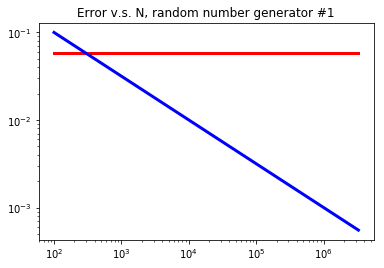

100 61 2.44 0.7015926535897932
200 133 2.66 0.481592653589793
400 271 2.71 0.43159265358979315
800 542 2.71 0.43159265358979315
1600 1133 2.8325 0.3090926535897931
3200 2280 2.85 0.291592653589793
6400 4573 2.858125 0.2834676535897933
12800 9039 2.8246875 0.3169051535897931
25600 18050 2.8203125 0.3212801535897931
51200 36059 2.817109375 0.3244832785897933
102400 72173 2.8192578125 0.32233484108979304
204800 144596 2.824140625 0.31745202858979304
409600 289877 2.830830078125 0.31076257546479313
819200 579792 2.831015625 0.3105770285897931
1638400 1158642 2.8287158203125 0.3128768332772931
3276800 2317269 2.828697509765625 0.3128951438241683


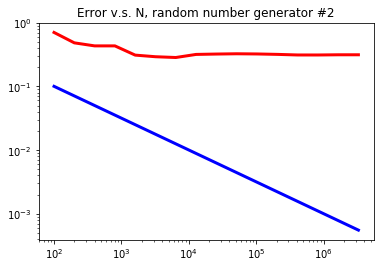

100 78 3.12 0.02159265358979301
200 158 3.16 0.018407346410207026
400 323 3.23 0.08840734641020687
800 649 3.245 0.10340734641020699
1600 1246 3.115 0.026592653589792903
3200 2526 3.1575 0.01590734641020708
6400 4951 3.094375 0.04721765358979324
12800 10107 3.1584375 0.01684484641020667
25600 20110 3.1421875 0.0005948464102067952
51200 40072 3.130625 0.010967653589792903
102400 80245 3.1345703125 0.007022341089792938
204800 160992 3.144375 0.002782346410207026
409600 322100 3.1455078125 0.003915158910206884
819200 643308 3.14115234375 0.0004403098397931515
1638400 1286712 3.14138671875 0.0002059348397929206
3276800 2572862 3.14070068359375 0.0008919699960432403


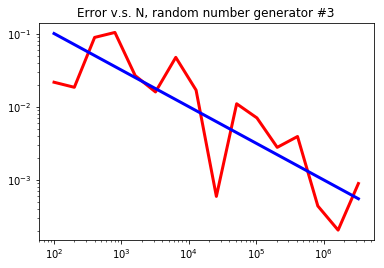

In [55]:
# Part 1
# Hit and miss Monte Carlo integration
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

for k in [1,2,3]:
    n0 = 100
    for i in range(ngroups):

        N[i] = n0
        x = gen(n0,k)
        y = gen(n0,k)
        I[i] = 0.
        Nin = 0
        for j in range(n0):
            if(y[j] < np.sqrt(1-x[j]**2)):
                Nin += 1

        I[i] = 4.*float(Nin)/float(n0)
        E[i] = abs(I[i]-np.pi)
        print (n0,Nin,I[i],E[i])
        n0 *= 2
        
    plt.figure()
    plt.plot(N,E,'r-',lw=3);
    plt.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3);
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Error v.s. N, random number generator #{}'.format(k))
    plt.show()

## 2. Simple Monte Carlo Integration

100 3.4841397419484172 0.34254708835862413
200 3.484139741948417 0.3425470883586237
400 3.4841397419484132 0.34254708835862013
800 3.4841397419484 0.3425470883586068
1600 3.484139741948407 0.3425470883586139
3200 3.4841397419484315 0.34254708835863834
6400 3.484139741948444 0.3425470883586508
12800 3.48413974194845 0.342547088358657
25600 3.484139741948453 0.3425470883586601
51200 3.4841397419476827 0.3425470883578896
102400 3.4841397419466147 0.34254708835682157
204800 3.484139741955344 0.34254708836555103
409600 3.484139741961732 0.3425470883719388
819200 3.4841397419594604 0.3425470883696673
1638400 3.484139741958324 0.34254708836853087
3276800 3.4841397419577556 0.34254708836796244


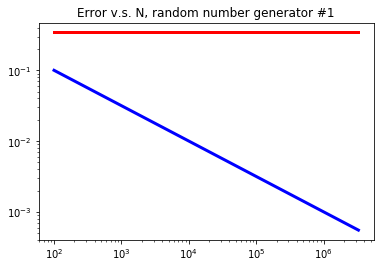

100 3.0015029537655575 0.14008969982423558
200 3.101017994194918 0.040574659394875034
400 3.096052653708274 0.04553999988151913
800 3.101795642448037 0.039797011141756045
1600 3.1485304643040974 0.006937810714304327
3200 3.1486095186684255 0.007016865078632417
6400 3.1501577993947723 0.008565145804979135
12800 3.137733307706979 0.0038593458828142246
25600 3.13503459433946 0.006558059250333148
51200 3.134612197201202 0.0069804563885909054
102400 3.135483270468827 0.006109383120965983
204800 3.139141965847104 0.002450687742689084
409600 3.1422893429927177 0.0006966894029245552
819200 3.1424177182856217 0.0008250646958285479
1638400 3.1416970009233705 0.00010434733357733705
3276800 3.1418327867955718 0.0002401332057786476


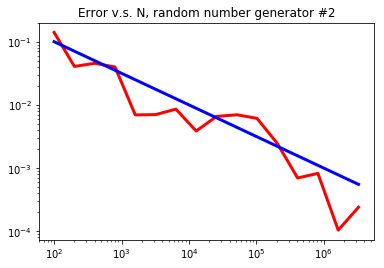

100 3.2302849737413437 0.0886923201515506
200 3.0551124192819152 0.08648023430787788
400 3.220369860667006 0.07877720707721281
800 3.1487723321769483 0.0071796785871551805
1600 3.139324951801985 0.0022677017878081074
3200 3.1566999080079636 0.015107254418170513
6400 3.157479875578579 0.015887221988785782
12800 3.1615636794884603 0.019971025898667172
25600 3.1417430579609698 0.00015040437117663785
51200 3.13748198767165 0.00411066591814313
102400 3.144637335037261 0.003044681447467834
204800 3.1443256398161448 0.0027329862263516524
409600 3.14169889828714 0.00010624469734699105
819200 3.1415905928808234 2.0607089696866865e-06
1638400 3.1411795052706517 0.0004131483191414098
3276800 3.141482961889973 0.00010969169982022464


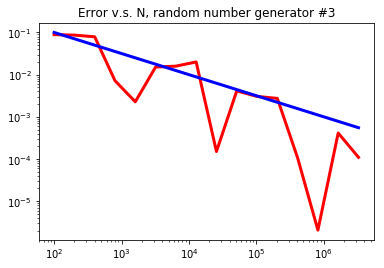

In [56]:
# Part 2
# Simple Monte Carlo Integration
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

for k in [1,2,3]:
    n0 = 100
    for i in range(ngroups):

        N[i] = n0
        r = gen(n0,k)
        I[i] = 0.
        for j in range(n0):
            x = r[j]
            I[i] += np.sqrt(1-x**2)

        I[i] *= 4./float(n0)
        E[i] = abs(I[i]-np.pi)
        print(n0,I[i],E[i])
        n0 *= 2
        
    plt.figure()
    plt.plot(N,E,'r-',lw=3);
    plt.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3);
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Error v.s. N, random number generator #{}'.format(k))
    plt.show()

## 3 and 4. Estimate and compare std

In [57]:
# Part 3 and Part 4
for k in [1,2,3]:
    
    n0 = 100000
    I = np.zeros(n0)
    r = gen(n0,k)
    for j in range(n0):
        x = r[j]
        I[j] = 4*np.sqrt(1-x**2)

    def group_measurements(ngroups):
        global I,n0

        nmeasurements = n0/ngroups
        for n in range(ngroups):
            Ig = 0.
            Ig2 = 0.
            for i in range(int(n*nmeasurements),int((n+1)*nmeasurements)):
                Ig += I[i]
                Ig2 += I[i]**2
            Ig /= nmeasurements
            Ig2 /= nmeasurements
            sigma = Ig2-Ig**2
            print(Ig,Ig2,sigma)
    print('\nRandom number generator #{}\n'.format(k))
    group_measurements(10)
    print("=============================")
    group_measurements(20)
    print("=============================")
    group_measurements(1)




Random number generator #1

3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484483 12.509090909091013 0.3698611676664125
3.4841397419484403 12.509090909090851 0.36986116766630595
3.4841397419484403 12.509090909090851 0.36986116766630595
3.4841397419484403 12.509090909090851 0.36986116766630595
3.4841397419484403 12.509090909090851 0.36986116766630595
3.4841397419484403 12.509090909090851 0.36986116766630595
3.4841397419484403 12.509090909090851 0.36986116766630595
3.4841397419484403 12.509090909090851 0.3698611676663

Comments:

First random number generator totally fails. We can see that the sequence starts repeating itself in a period of 5 - so it's definitly not a good random number generator. RANDU does not approach the 'correct' result even when sample getting really large in 'hit and miss' MC integration, but it's doing good in simple MC integration.